Book:  Introduction to Probability by Joseph K. Blitzstein & Jessica Hwang

Example 1.4.10 (Birthday problem). There are k people in a room. Assume each
person’s birthday is equally likely to be any of the 365 days of the year (we exclude
February 29), and that people’s birthdays are independent (we will define indepen
dence formally later, but intuitively it means that knowing some people’s birthdays
gives us no information about other people’s birthdays; this would not hold if, e.g.,
we knew that two of the people were twins). What is the probability that at least
one pair of people in the group have the same birthday?

## 🎂 The Birthday Problem: Calculating the Probability of Shared Birthdays

### 1. Total Possibilities

The total number of ways to assign birthdays to the $k$ people in the room is $365^k$.

* We can imagine this as sampling the $365$ days of the year **$k$ times, with replacement**.
* By assumption, all of these $365^k$ possibilities are equally likely, allowing us to use the naive definition of probability.

### 2. The Direct Counting Problem (Why it's Hard)

The naive definition of probability states that:
$$P(\text{event}) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}$$

To find $P(\text{at least 1 birthday match})$ directly, we would need to count the number of ways to assign birthdays such that **at least two people share a birthday**.

This counting problem is complex because of the many different scenarios for a match:

> *...it could be Emma and Steve who share a birthday, or Steve and Naomi, or all three of them, or the three of them could share a birthday while two others in the group share a different birthday, or various other possibilities.*

### 3. Using the Complement

Instead of counting the matches directly, we use the **complement** event, which is much easier to count:

$$P(\text{at least 1 match}) = 1 - P(\text{no match})$$

The complement is the number of ways to assign birthdays to $k$ people such that **no two people share a birthday**.

### 4. Counting the Complement

Counting the number of ways to assign birthdays with no matches is equivalent to **sampling the $365$ days of the year without replacement**:

* The first person can have any of $365$ days.
* The second person must have one of the remaining $364$ days.
* The third person must have one of the remaining $363$ days.
* ...
* The $k$-th person must have one of the remaining $(365 - k + 1)$ days.

The number of possibilities with **no birthday match** (for $k \leq 365$) is:

$$\text{Favorable outcomes} = 365 \cdot 364 \cdot 363 \cdots (365 - k + 1)$$

### 5. The Final Probabilities

Therefore, the probability of **no birthday matches** in a group of $k$ people is:

$$P(\text{no birthday match}) = \frac{365 \cdot 364 \cdots (365 - k + 1)}{365^k}$$

And the probability of **at least one birthday match** is:

$$P(\text{at least 1 birthday match}) = 1 - \frac{365 \cdot 364 \cdots (365 - k + 1)}{365^k}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_birthday_probability(k_values):
    """
    Calculates the probability of at least one shared birthday in a group of k people.

    P(at least 1 match) = 1 - P(no match)
    P(no match) = (365/365) * (364/365) * ... * ((365 - k + 1) / 365)
    """
    probabilities = []

    for k in k_values:
        if k > 365:
            # If k > 365, the probability of a match is 1 (by Pigeonhole Principle)
            prob_match = 1.0
        elif k == 1:
            # If k = 1, the probability of a match is 0
            prob_match = 0.0
        else:
            # Calculate P(no match) iteratively
            prob_no_match = 1.0
            for i in range(k):
                # The term is (365 - i) / 365
                prob_no_match *= (365 - i) / 365.0

            prob_match = 1.0 - prob_no_match

        probabilities.append(prob_match)

    return np.array(probabilities)

The Pigeonhole Principle is a simple but powerful math concept: if you have more items (pigeons) than containers (pigeonholes), at least one container must hold more than one item, proving that a specific outcome is guaranteed, like having two people with the same birthday in a group. It's used in discrete math, computer science, and combinatorics to prove existence theorems by mapping items to categories, showing unavoidable overlaps.

In [7]:
# Define the range of k values
k_values = np.arange(1, 101) # From 1 to 100 people

# Calculate the probabilities
probabilities = calculate_birthday_probability(k_values)

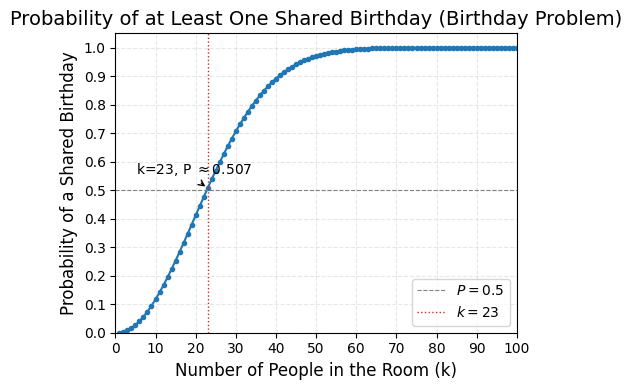

In [12]:
# Create the plot
plt.figure(figsize=(5, 4))
plt.plot(k_values, probabilities, marker='o', linestyle='-', markersize=3, color='tab:blue')

# Add a horizontal line at P=0.5 for reference, which is crossed around k=23
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label='$P=0.5$')
plt.axvline(23, color='tab:red', linestyle=':', linewidth=1, label='$k=23$')

# Annotate the point where probability crosses 0.5 (which is k=23)
# Find the index where the probability first exceeds 0.5
idx_23 = np.where(k_values == 23)[0][0]
plt.annotate(
    'k=23, P $\\approx 0.507$',
    (23, probabilities[idx_23]),
    textcoords="offset points",
    xytext=(-10, 10),
    ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='black')
)

plt.title('Probability of at Least One Shared Birthday (Birthday Problem)', fontsize=14)
plt.xlabel('Number of People in the Room (k)', fontsize=12)
plt.ylabel('Probability of a Shared Birthday', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xlim(0, 100)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()